## Question 1

Consider the data in the attached file, "data.txt". This data is sampled from a periodic function $f(t)$ plus some high-frequency noise; the first column gives the time in seconds and the second column is the observed function value (which includes noise). Write a program to determine the periodic function $f(t)$ from which the data was sampled. First filter out the high-frequency noise. Then determine $f(t)$ based on the remaining frequency components. It's a sum of sine waves; print out the amplitude and frequency of each sine wave that makes up $f(t)$. Plot the original data overlaid with your function. You may use built-in Python functions to perform FFT's.

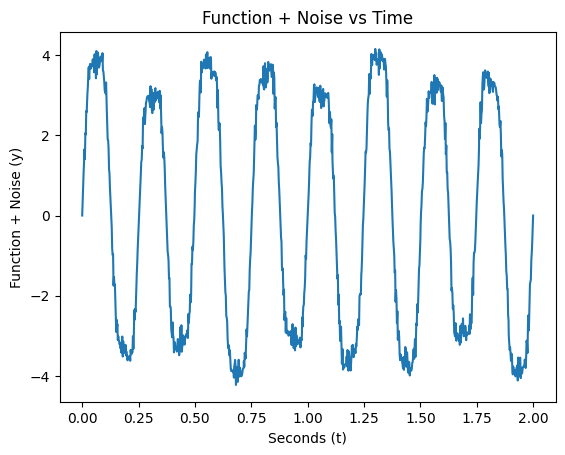

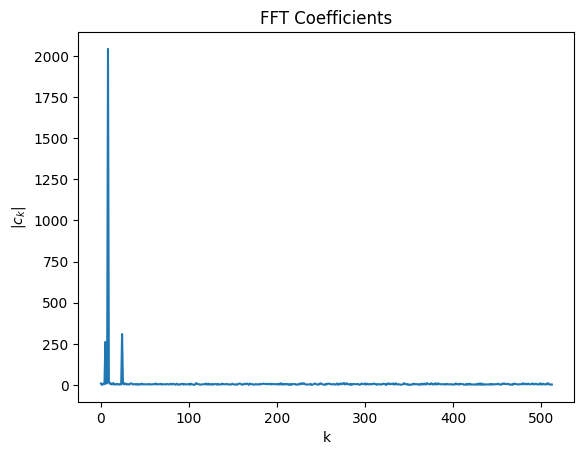

513  coeffcients
Keeping  10


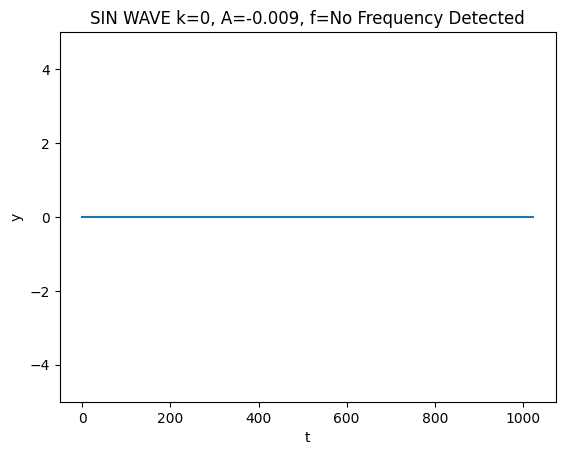

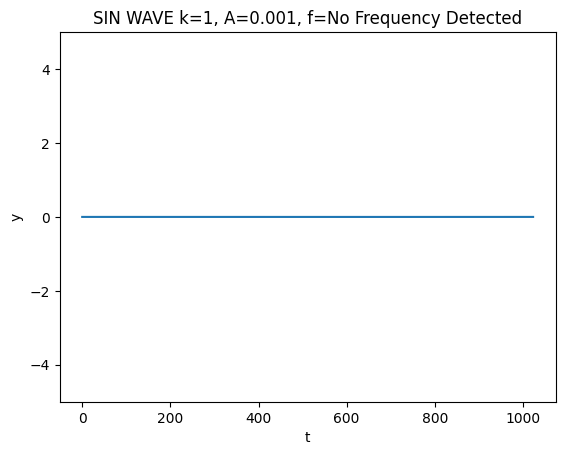

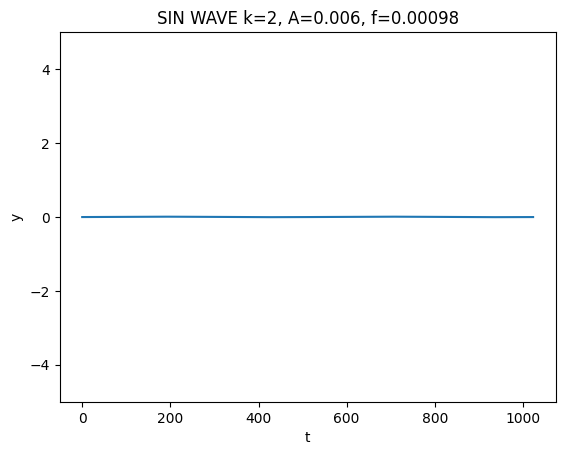

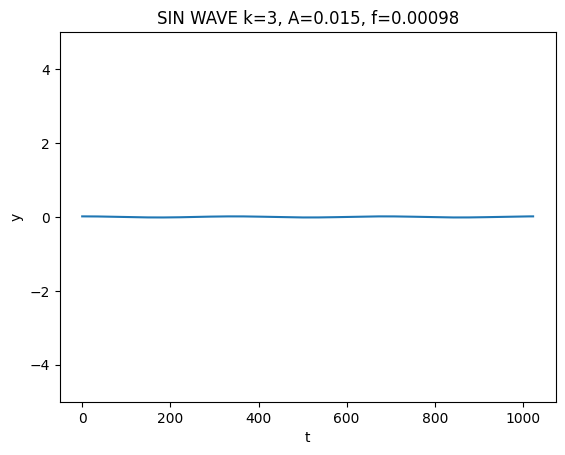

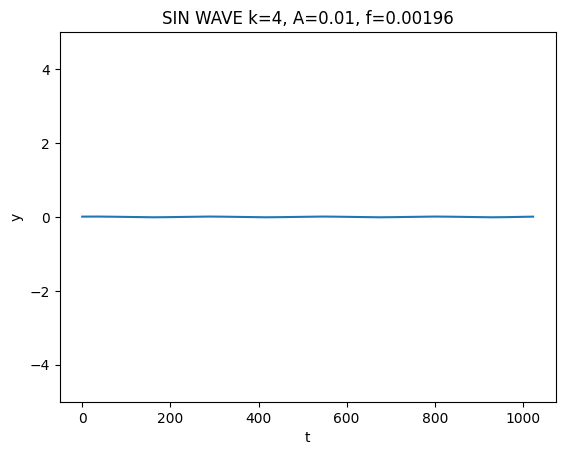

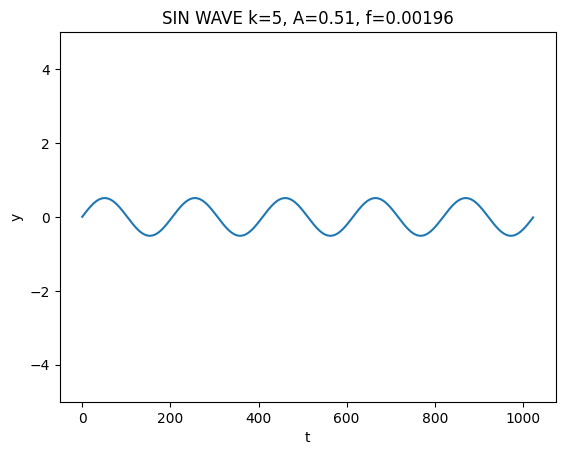

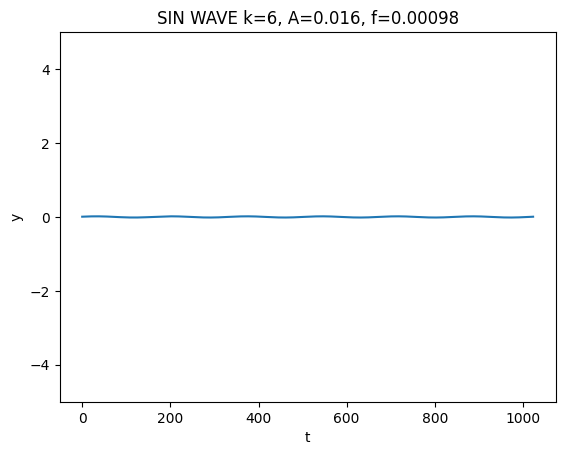

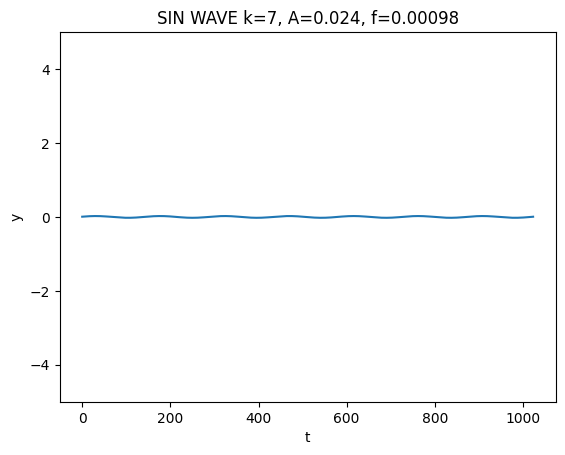

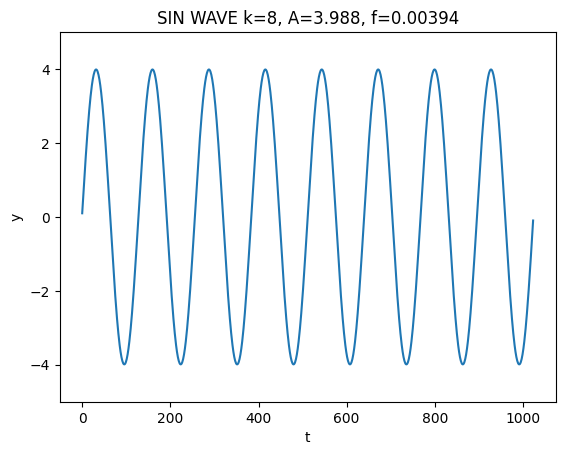

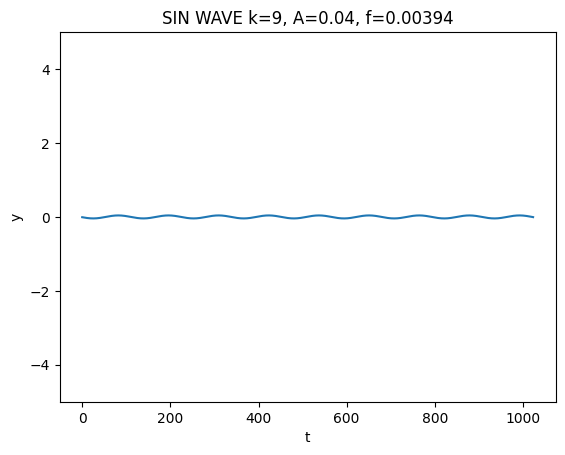

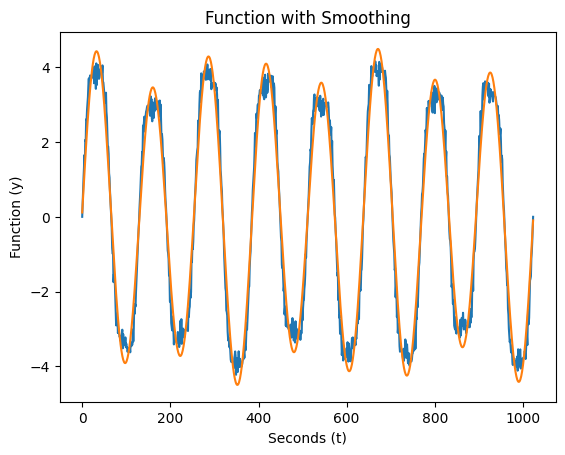

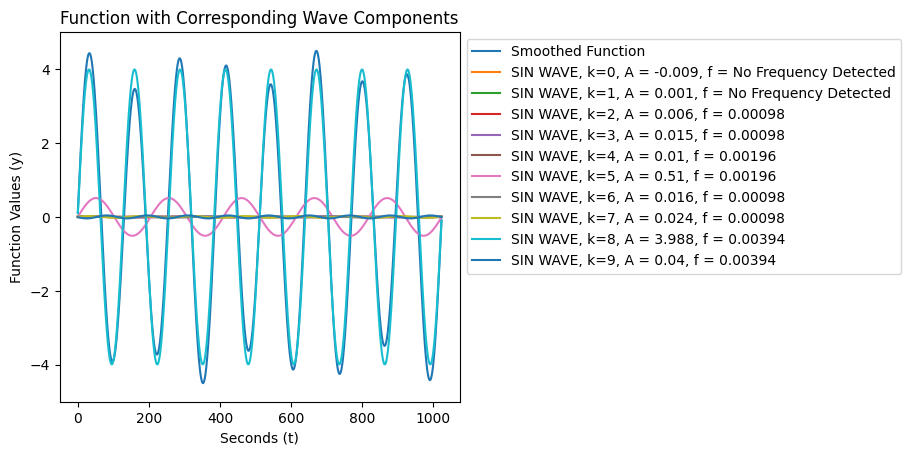

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.fft as fft

def process_list(lst):

    singleton_lists = []

    for index, value in enumerate(lst):
        new_list = [0] * len(lst)
        new_list[index] = value
        singleton_lists.append(new_list)

    return singleton_lists

data = np.loadtxt("data.txt",float)
t, y = data[:, 0], data[:, 1]

plt.figure(1)
plt.plot(t, y)
plt.ylabel("Function + Noise (y)")
plt.xlabel("Seconds (t)")
plt.title("Function + Noise vs Time")

plt.show()

c = fft.rfft(y)
cmag=abs(c)

plt.figure(2)
plt.plot(cmag)
plt.ylabel("$|c_k|$")
plt.xlabel("k")
plt.title("FFT Coefficients")

plt.show()

n = len(c)
print(n," coeffcients")
ntokeep=10
print("Keeping ",ntokeep)

for i in range(ntokeep,n):
    c[i]=0


coeff_lists = process_list(c)

n = 1
epsilon = 1e-8
coefficient_data = {}

for coeff in coeff_lists:
    inverse_transform_data = fft.irfft(coeff)
    reference = inverse_transform_data[0]

    for index, value in enumerate(inverse_transform_data[1:]):
        if reference - epsilon < value < reference + epsilon:
            period = 2*index
            try: 
                frequency = 1/period
            except:
                frequency = 'No Frequency Detected'
            break
    
    if type(frequency) == float:
        coefficient_data[f"k={n-1}"] = {"INDEX": n-1, "DATA": inverse_transform_data,
                                        "AMPLITUDE": round(max(inverse_transform_data), 3), 
                                        "PERIOD": round(period, 5), "FREQUENCY": round(frequency, 5)}
    else:
        coefficient_data[f"k={n-1}"] = {"INDEX": n-1, "DATA": inverse_transform_data,
                                        "AMPLITUDE": round(max(inverse_transform_data), 3), 
                                        "PERIOD": round(period, 5), "FREQUENCY": frequency}    
    
    plt.figure(2 + n)
    plt.plot(coefficient_data[f"k={n-1}"]['DATA'])
    plt.ylim((-5, 5))
    plt.ylabel("y")
    plt.xlabel("t")
    plt.title(f"SIN WAVE k={n-1}, A={coefficient_data[f'k={n-1}']['AMPLITUDE']}, f={coefficient_data[f'k={n-1}']['FREQUENCY']}")
    plt.show()
    n += 1
    if n > ntokeep:
        break
    
ynew = fft.irfft(c)

plt.figure(2 + n)
plt.plot(y,label="No Smoothing")
plt.plot(ynew,label="With Smoothing")
plt.ylabel("Function (y)")
plt.xlabel("Seconds (t)")
plt.title("Function with Smoothing")

plt.figure(3 + n)
plt.plot(ynew, label = "Smoothed Function")
for plot_data in coefficient_data.values():
    plt.plot(plot_data["DATA"], label = f"SIN WAVE, k={plot_data['INDEX']}, A = {plot_data['AMPLITUDE']}, f = {plot_data['FREQUENCY']}")
    plt.ylim((-5, 5))
    plt.ylabel("Function Values (y)")
    plt.xlabel("Seconds (t)")
    plt.title("Function with Corresponding Wave Components")

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.subplots_adjust(right=0.75) # Adjust the subplot to make room for the legend

# Show the plot
plt.show()

## Question 2

Consider the data in the attacahed file, "note.txt". This data represents the wave-form of a single note played on a piano. Write a program that plots the waveform, then calculates the Fourier Transform, and plots the magnitude of the resulting coefficients. Based on these coefficients, determine what note was being played. (Use https://en.wikipedia.org/wiki/Piano_key_frequencies for the relationship between frequencies and musical notes.) You may use built-in Python functions to perform FFTs. The sampling frequency for the waveform is $44.1$ kHz.

Dominant k value is 780
Frequency of Note played is 524.871826171875
The name of the note being played is C5


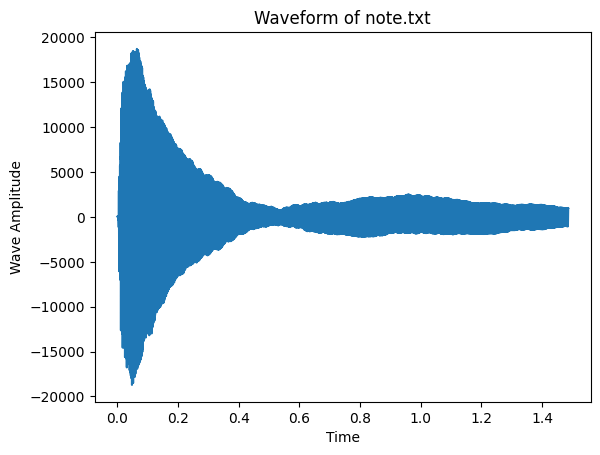

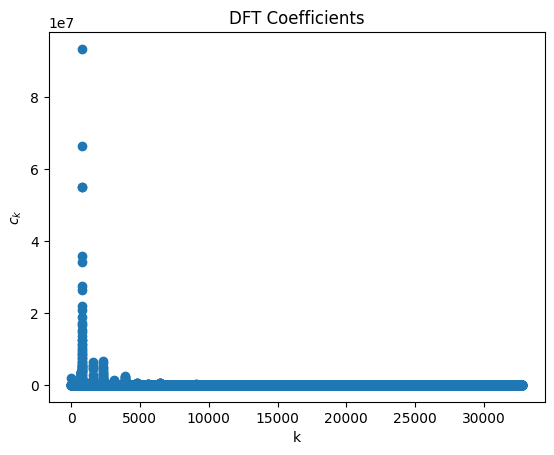

In [32]:
import numpy as np
import math
import matplotlib.pyplot as plt
import numpy.fft as fft

y = np.loadtxt("note.txt",float)

Dt = 1/44.1e3
N = len(y)#want a power of 2 since we will use FFT
L = N*Dt

#calculate coefficients
c = fft.rfft(y)
#magnitude
cmag=abs(c)

k_dominant = list(cmag).index(max(cmag))
print(f"Dominant k value is {k_dominant}")
print(f"Frequency of Note played is {k_dominant/L}")
print(f"The name of the note being played is C5")

T = np.arange(0, L, Dt)
plt.figure(1)
plt.plot(T, y)
plt.ylabel("Wave Amplitude")
plt.xlabel("Time")
plt.title("Waveform of note.txt")

plt.figure(2)
plt.plot(cmag,lw=0,marker="o")
plt.ylabel("$c_k$")
plt.xlabel("k")
plt.title("DFT Coefficients")


plt.show()